In [1]:
import bForStrain as bFS

mesh = bFS.Mesh('params.py') 
mesh.construct()  
mesh.assign_centroids()

results = bFS.Inversion(mesh)
results.post_process()


Building mesh from coordinates and extent given in params.py

 Smooth triangulation...

 -----------------------------------------------------------------------
      |ITER.|          |MOVE(X)|          |DTRI(X)|          |T. ITER|  
 -----------------------------------------------------------------------
          4               5863              13584             0.064000
          8               2948              13526             0.070000
         12                470              13512             0.080000
         16                 84              13522             0.079000
         20                 25              13520             0.078000
         24                 16              13520             0.078000
         28                 15              13520             0.078000
         32                 16              13520             0.077000

Computing Body Force Green's Functions
Computing Creepings Green's functions calculation
  10 % completed
  20 % completed
 

Text(0.5, 1.0, 'Mean Maximum Shear Strain Rate (micro-strain/yr)')

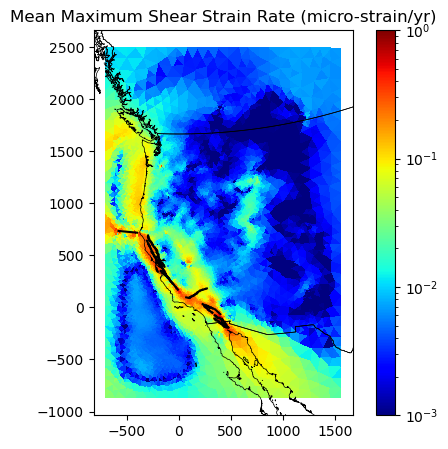

In [2]:

from matplotlib.colors import LogNorm
mean_maxshear = results.max_shear.mean(axis=0)
fig = mesh.plot(mean_maxshear,scale=LogNorm(vmin=0.001, vmax=1),colormap='jet',borders=True)
fig.set_title('Mean Maximum Shear Strain Rate (micro-strain/yr)')

Text(0.5, 1.0, 'Mean velocity in cell')

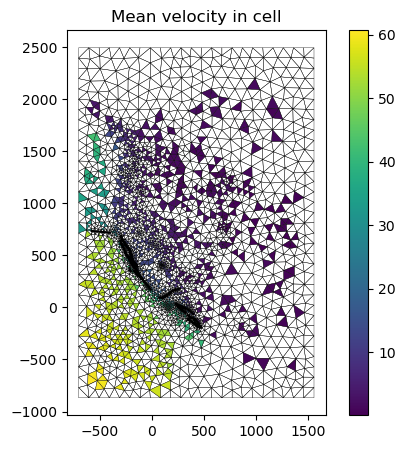

In [10]:
values=mesh.vel_centroids.mag()
ax=mesh.plot(values,edges=True,lonlat=False,borders=False)
ax.set_title("Mean velocity in cell")


Computing Body Force Green's Functions
Computing Creepings Green's functions calculation
  10 % completed
  20 % completed
  30 % completed
  40 % completed
  50 % completed
  60 % completed
  70 % completed
  80 % completed
  90 % completed
  100 % completed
Performing inversion
Inversion time: 10.3 seconds
Chi-2 for beta = 40: 4.95
Performing inversion
Inversion time: 10.2 seconds
Chi-2 for beta = 45: 5.42
Performing inversion
Inversion time: 10.3 seconds
Chi-2 for beta = 50: 5.90
Unwrapping results to 2D numpy arrays. Calculating dilitation and max shear.


Text(0.5, 1.0, 'Mean Maximum Shear Strain Rate (micro-strain/yr)')

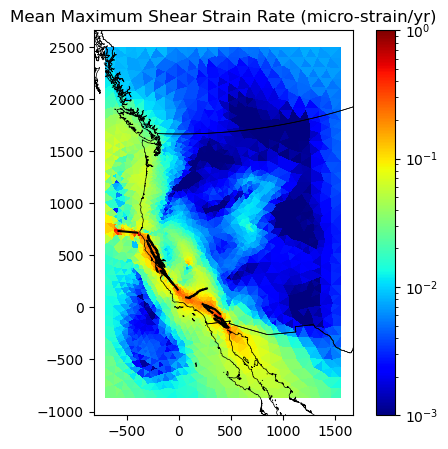

In [25]:
mean_maxshear = results.max_shear.mean(axis=0)
clim = LogNorm(vmin=0.001, vmax=1)
mesh.plot(mean_maxshear,scale=clim,colormap='jet',borders=True)

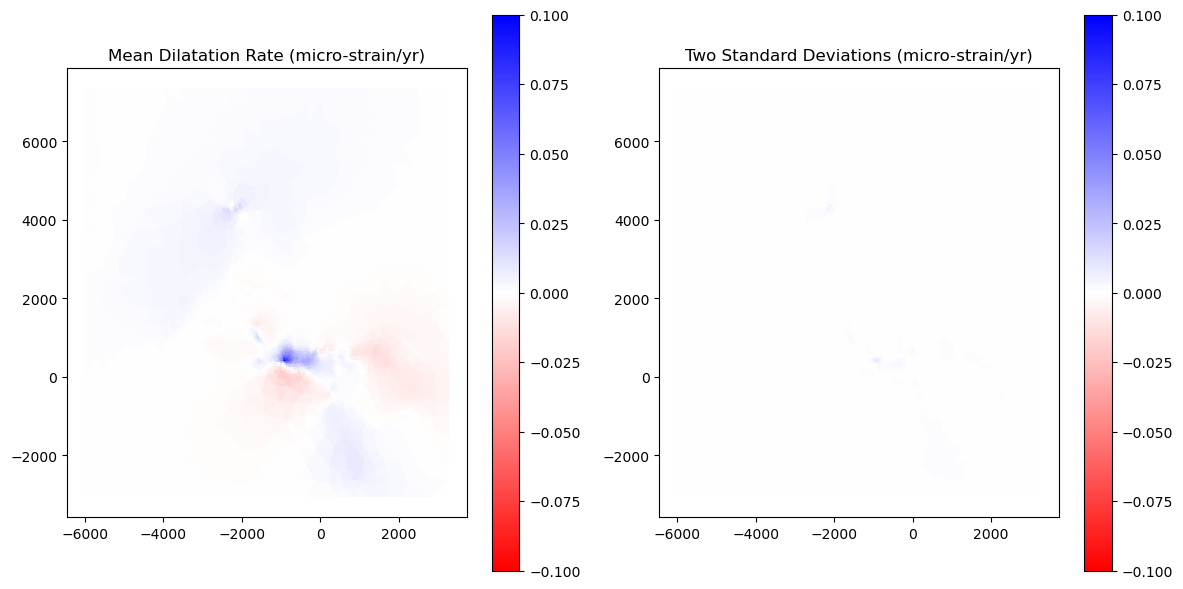

In [12]:
mean_dilatation = results.dilatation.mean(axis=0)
std_dilatation = results.dilatation.std(axis=0)

vals = [mean_dilatation,2*std_dilatation]

fig3 = mesh.plot(vals,colormap='bwr_r',scale=Normalize(vmin=-0.1, vmax=0.1))

fig3[0].set_title('Mean Dilatation Rate (micro-strain/yr)')
fig3[1].set_title('Two Standard Deviations (micro-strain/yr)')
plt.tight_layout()
plt.show()

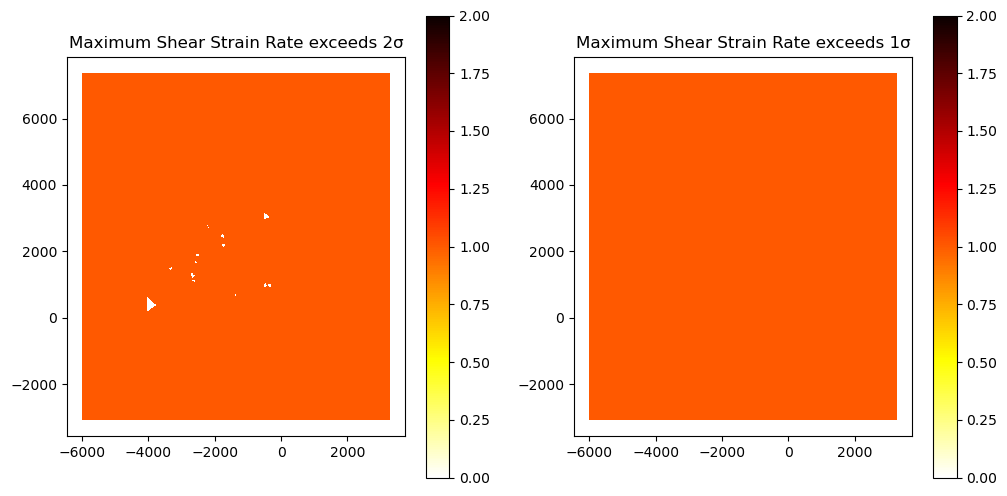

In [13]:
ind2sig = mean_maxshear > 2 * std_maxshear
ind1sig = mean_maxshear > 1 * std_maxshear

vals=[ind2sig,ind1sig]

fig4= mesh.plot(vals,colormap='hot_r',scale=Normalize(vmin=0, vmax=2))

fig4[0].set_title('Maximum Shear Strain Rate exceeds 2σ')
fig4[1].set_title('Maximum Shear Strain Rate exceeds 1σ')
plt.show()

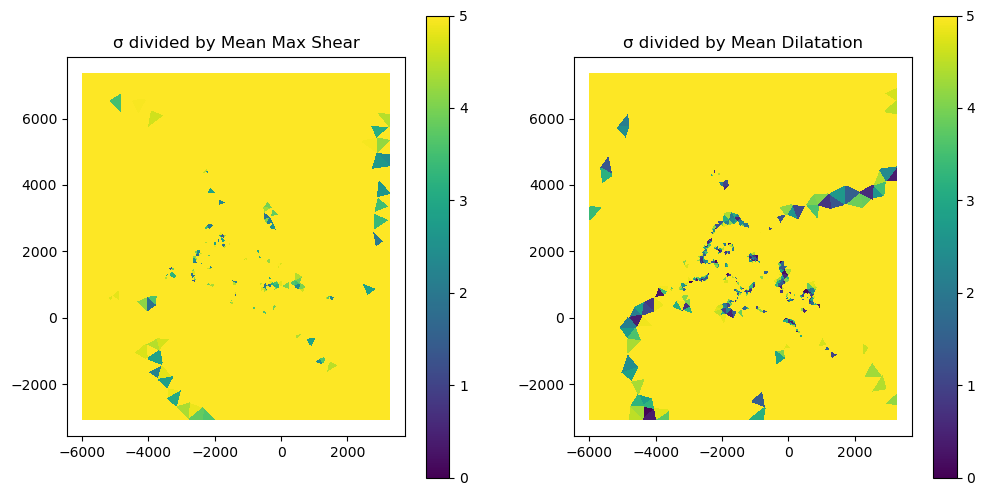

In [14]:
shear_rat = abs(mean_maxshear)/std_maxshear
dil_rat = abs(mean_dilatation)/std_dilatation

vals = [shear_rat, dil_rat]

fig5 = mesh.plot(vals,colormap='viridis',scale=Normalize(vmin=0, vmax=5))

fig5[0].set_title('σ divided by Mean Max Shear')
fig5[1].set_title('σ divided by Mean Dilatation')
plt.show()


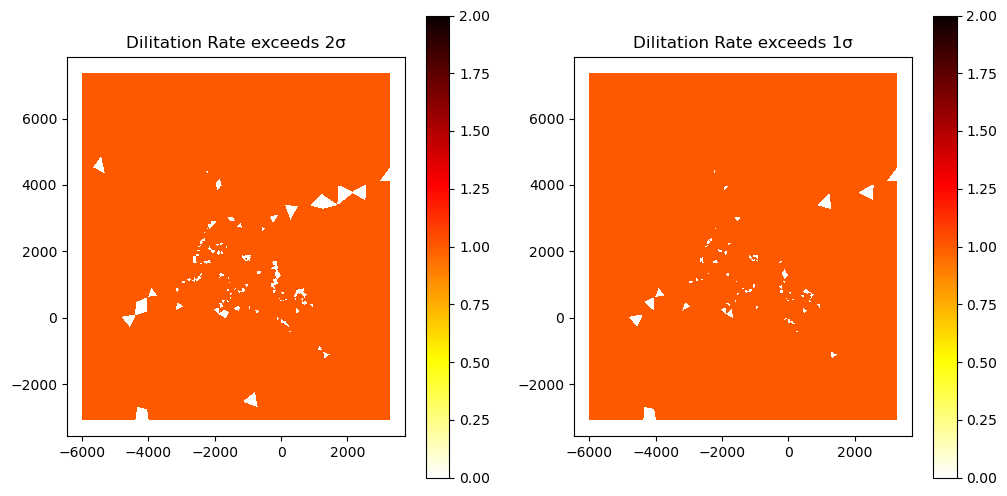

In [15]:

ind2sig = abs(mean_dilatation) > 2 * std_dilatation
ind1sig = abs(mean_dilatation) > 1 * std_dilatation

vals = [ind2sig, ind1sig]

fig6 = mesh.plot(vals,colormap='hot_r',scale=Normalize(vmin=0, vmax=2))

fig6[0].set_title('Dilitation Rate exceeds 2σ')
fig6[1].set_title('Dilitation Rate exceeds 1σ')
plt.show()

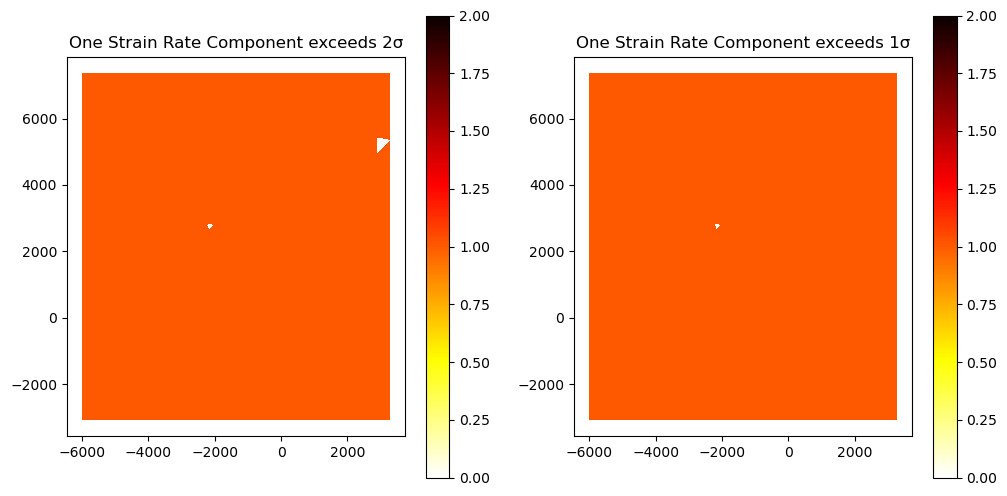

In [16]:

Exx_mean = results.Exx.mean(axis=0)
Exy_mean = results.Exy.mean(axis=0)
Eyy_mean = results.Eyy.mean(axis=0)

Exx_std = results.Exx.std(axis=0)
Exy_std = results.Exy.std(axis=0)
Eyy_std = results.Eyy.std(axis=0)

ind2sig = (abs(Exx_mean) > 2 * Exx_std) | (abs(Exy_mean) > 2 * Exy_std) | (abs(Eyy_mean) > 2 * Eyy_std)
ind1sig = (abs(Exx_mean) > 1 * Exx_std) | (abs(Exy_mean) > 1 * Exy_std) | (abs(Eyy_mean) > 1 * Eyy_std)

vals = [ind2sig, ind1sig]

fig7 = mesh.plot(vals,colormap='hot_r',scale=Normalize(vmin=0, vmax=2))

fig7[0].set_title('One Strain Rate Component exceeds 2σ')
fig7[1].set_title('One Strain Rate Component exceeds 1σ')
plt.show()

In [8]:
results.compute_Eeig()

mean_minvals = results.minvals.mean(axis = 0)
std_minvals  = results.minvals.std(axis = 0)

mean_maxvals = results.maxvals.mean(axis = 0)
std_maxvals  = results.maxvals.std(axis = 0)

ind1 = (abs(mean_minvals) > 1.0 * std_minvals) | (abs(mean_maxvals) > 1.0 * std_maxvals)
ind2 = (abs(mean_minvals) > 1.5 * std_minvals) | (abs(mean_maxvals) > 1.5 * std_maxvals)
ind3 = (abs(mean_minvals) > 2.0 * std_minvals) | (abs(mean_maxvals) > 2.0 * std_maxvals)

vals = [ind3,ind2,ind1]

fig8 = mesh.plot(vals,colormap='hot_r',cbar=False,scale=Normalize(vmin=0, vmax=2))

fig8[0].set_title('One Principal Strain Rate exceeds 2σ')
fig8[1].set_title('One Principal Strain Rate exceeds 1.5σ')
fig8[2].set_title('One Principal Strain Rate exceeds 1σ')
plt.show()

AttributeError: 'list' object has no attribute 'shape'